In [2]:
import pandas as pd
import plotly.express as px

In [3]:
data = pd.read_parquet('../data/processed/PurpleAir_daily.parquet')[['Channel A PM2.5 (ug/m3)']]

In [4]:
def truncate_sensor_name(df):
    """ Remove PA_II_ from sensor name"""
    for i, value in enumerate(df['sensor_name']):
        df.loc[i, 'sensor_name'] = value.replace("PA_II_", "")
    return df

def resample_by_sensor(df,fq):
    data = df.groupby([pd.Grouper(level='sensor_name'),pd.Grouper(level='created_at',freq=fq)]).mean()
    return data

def update_layout(fig, no_bg=True, short_xticklabel=True, fontsize=None, nticks=None):
    if fontsize is not None:
        fig.update_layout(
            font=dict(size=fontsize)
        )
    if no_bg:
        fig.update_layout(
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
        )
        for update_axes in [fig.update_xaxes, fig.update_yaxes]:
            update_axes(
                zeroline=True,
                linecolor='black'
            )

    if short_xticklabel:
        fig.update_xaxes(
            tickangle=45,
            tickformat="%m-%y",
            nticks=nticks,
        )
    return fig

In [5]:
data = resample_by_sensor(data,fq='W')

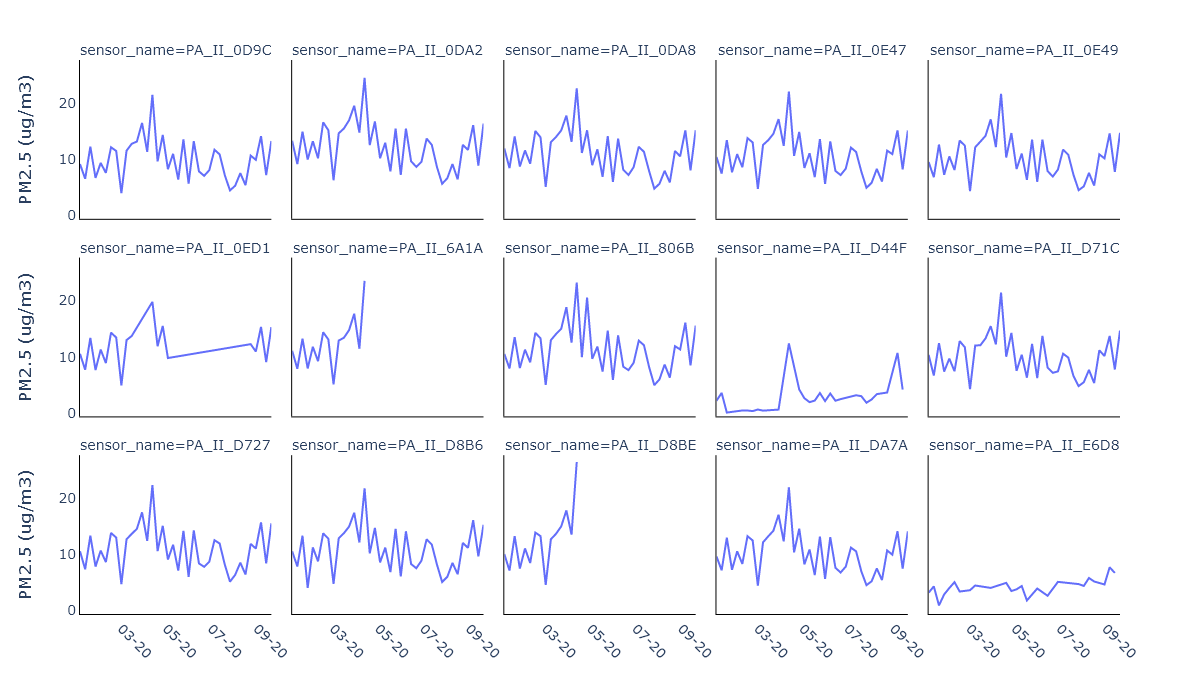

In [10]:
labels = {'created_at':'','Channel A PM2.5 (ug/m3)':'PM2.5 (ug/m3)'}
fig = px.line(data.reset_index(), x="created_at",y="Channel A PM2.5 (ug/m3)",
              facet_col='sensor_name',facet_col_wrap=5,
              labels=labels, width=1200, height=700)

fig = update_layout(fig, fontsize=14, nticks=8)
    
fig.show("png",width=1200, height=700)

In [6]:
data_b = data.groupby([pd.Grouper(level='created_at')]).quantile(.5)
data_b['upper']=data.groupby([pd.Grouper(level='created_at')]).quantile(.75)
data_b['lower']=data.groupby([pd.Grouper(level='created_at')]).quantile(.25)

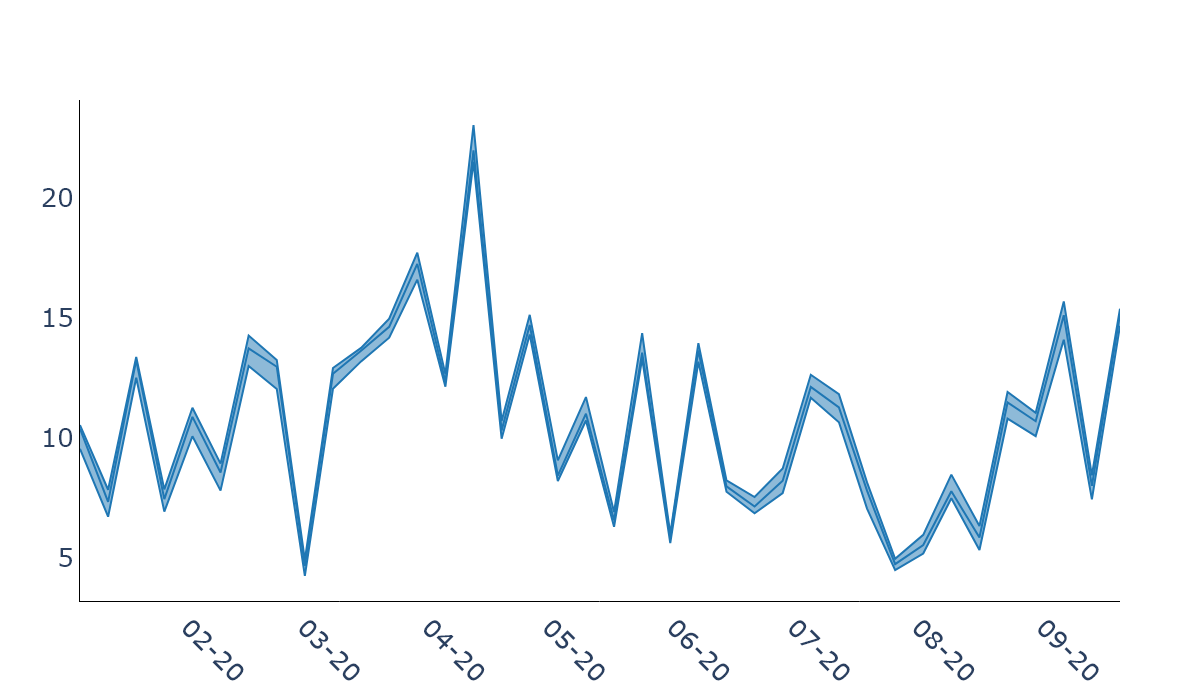

In [17]:
import plotly.graph_objects as go
fig=go.Figure()
color='#1f77b4'


fig.add_trace(go.Scatter(
    x=data_b.reset_index()['created_at'],
    y=data_b.reset_index()['lower'],
    fill=None,
    mode='lines',
    name='area',
    line_color=color
))

fig.add_trace(go.Scatter(
    x=data_b.reset_index()['created_at'],
    y=data_b.reset_index()['upper'],
    fill='tonexty',
    line_color=color
))

fig.add_trace(go.Scatter(
    x=data_b.reset_index()['created_at'],
    y=data_b.reset_index()['Channel A PM2.5 (ug/m3)'],
    name='area',
    line_color=color
))

fig.update_layout(
    showlegend=False
)

fig = update_layout(fig, fontsize=26, nticks=10)

fig.update_traces(mode='lines')
fig.show('png',width=1200, height=700)



NameError: name 'fb' is not defined

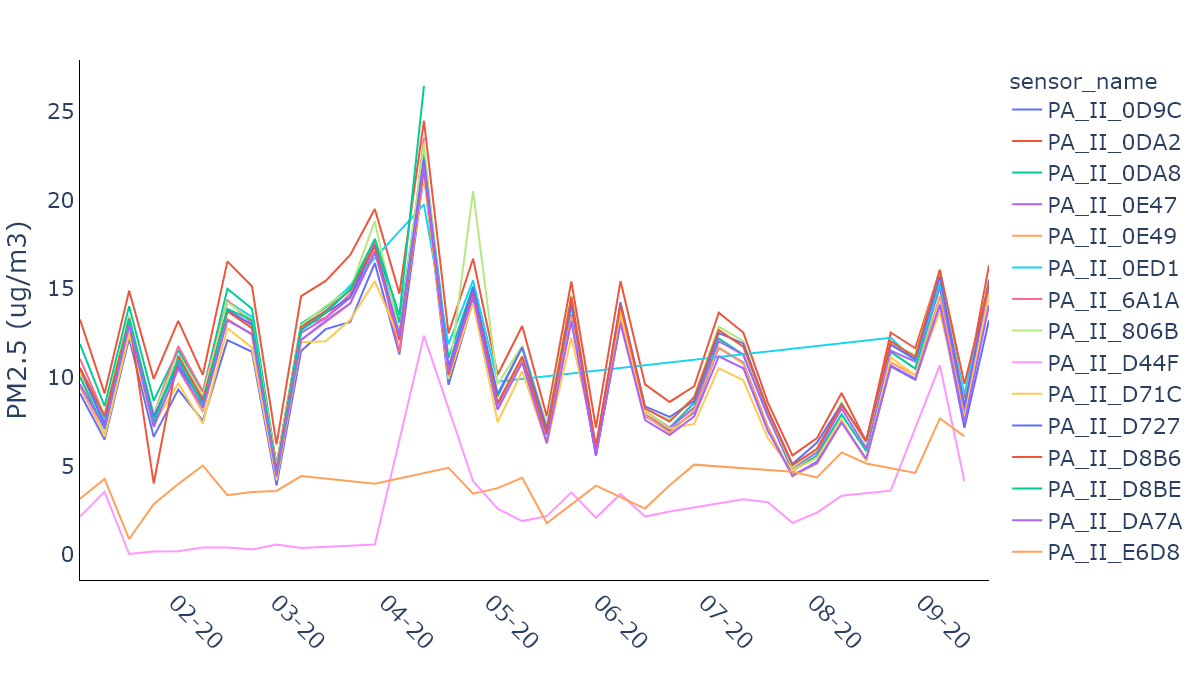

In [21]:
labels = {'created_at':'','Channel A PM2.5 (ug/m3)':'PM2.5 (ug/m3)'}
data2=data

fig = px.line(data.reset_index(), x="created_at",y='Channel A PM2.5 (ug/m3)',line_group='sensor_name',color='sensor_name',labels=labels, width=1200, height=700)
fig = update_layout(fig, fontsize=22, nticks=16)

fig.show("png",width=1200, height=700)